In [301]:
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import os, glob
import random

random.seed(70)
np.random.seed(70)
tf.random.set_seed(70)

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [302]:
PATH = os.getenv("HOME") + "/aiffel/aiffel/explorations/01/datasets/"

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(img_path)
    print(len(images), "images to be resized")
    
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")    
    print(len(images), " images resized")
    
resize_images(PATH + "large_train/scissor")
resize_images(PATH + "large_train/paper")
resize_images(PATH + "large_train/rock")
resize_images(PATH + "test/scissor")
resize_images(PATH + "test/paper")
resize_images(PATH + "test/rock")

/aiffel/aiffel/aiffel/explorations/01/datasets/large_train/scissor
516 images to be resized
516  images resized
/aiffel/aiffel/aiffel/explorations/01/datasets/large_train/paper
368 images to be resized
368  images resized
/aiffel/aiffel/aiffel/explorations/01/datasets/large_train/rock
429 images to be resized
429  images resized
/aiffel/aiffel/aiffel/explorations/01/datasets/test/scissor
100 images to be resized
100  images resized
/aiffel/aiffel/aiffel/explorations/01/datasets/test/paper
100 images to be resized
100  images resized
/aiffel/aiffel/aiffel/explorations/01/datasets/test/rock
100 images to be resized
100  images resized


In [303]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    print(idx)    
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  

    print(idx)    
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

(x_train, y_train)=load_data(PATH + "large_train", 1313)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
(x_test, y_test)=load_data(PATH + "test")
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

516
945
학습데이터(x_train)의 이미지 개수는 1313 입니다.
100
200
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (1313, 28, 28, 3)
y_train shape: (1313,)
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [87]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

img = load_img(PATH + 'train/scissor/0.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir= PATH + 'augm', save_prefix='rsp', save_format='jpeg'):
    i+=1
    if i > 20:
        break

In [14]:
from IPython.display import Image

In [19]:
Image(PATH+'augm/rsp_0_1053.jpeg')
Image(PATH+'augm/rsp_0_1438.jpeg')

In [324]:
import keras_tuner as kt

In [321]:
LR = Choice('learning_rate', [0.001, 0.0005, 0.0001], group='optimizer')
DROPOUT_RATE = Linear('dropout_rate', 0.0, 0.5, 5, group='dense')
NUM_DIMS = Range('num_dims', 8, 32, 8, group='dense')
NUM_LAYERS = Range('num_layers', 1, 3, group='dense')
L2_NUM_FILTERS = Range('l2_num_filters', 8, 64, 8, group='cnn')
L1_NUM_FILTERS = Range('l1_num_filters', 8, 64, 8, group='cnn')

def model_fn():

    LR = Choice('learning_rate', [0.001, 0.0005, 0.0001], group='optimizer')
    DROPOUT_RATE = Linear('dropout_rate', 0.0, 0.5, 5, group='dense')
    NUM_DIMS = Range('num_dims', 8, 32, 8, group='dense')
    NUM_LAYERS = Range('num_layers', 1, 3, group='dense')
    L2_NUM_FILTERS = Range('l2_num_filters', 8, 64, 8, group='cnn')
    L1_NUM_FILTERS = Range('l1_num_filters', 8, 64, 8, group='cnn')

    model = Sequential()
    model.add(Conv2D(L1_NUM_FILTERS, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(L2_NUM_FILTERS, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    for _ in range(NUM_LAYERS):
        model.add(Dense(NUM_DIMS, activation='relu'))
        model.add(Dropout(DROPOUT_RATE))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(LR))

    return model

tuner = Tuner(model_fn, 'val_accuracy' epoch_budget=500, max_epochs=5)
tuner.search(train_data,validation_data=validation_data)

SyntaxError: invalid syntax (<ipython-input-321-6ac188b74f68>, line 29)

In [314]:
n_channel_1=32
n_channel_2=64
n_channel_3=128
n_dense_1=256
n_dense_2=64
n_train_epoch=10

model=keras.models.Sequential()
'''
model.add(keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(28, 
                                                              28,
                                                              3)))
'''
#model.add(keras.layers.experimental.preprocessing.RandomRotation(0.1))
#model.add(keras.layers.experimental.preprocessing.RandomZoom(0.1))|
#model.add(keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
#model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(n_dense_1, activation='relu'))
model.add(keras.layers.Dense(n_dense_2, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation='softmax'))
                                  
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
42/42 [==============================] - 1s 4ms/step - loss: 1.0760 - accuracy: 0.4080
Epoch 2/10
42/42 [==============================] - 0s 4ms/step - loss: 0.9369 - accuracy: 0.5552
Epoch 3/10
42/42 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.6984
Epoch 4/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3607 - accuracy: 0.8720
Epoch 5/10
42/42 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.9098
Epoch 6/10
42/42 [==============================] - 0s 4ms/step - loss: 0.2545 - accuracy: 0.9154
Epoch 7/10
42/42 [==============================] - 0s 4ms/step - loss: 0.1134 - accuracy: 0.9617
Epoch 8/10
42/42 [==============================] - 0s 4ms/step - loss: 0.1081 - accuracy: 0.9660
Epoch 9/10
42/42 [==============================] - 0s 4ms/step - loss: 0.0794 - accuracy: 0.9740
Epoch 10/10
42/42 [==============================] - 0s 4ms/step - loss: 0.0563 - accuracy: 0.9843


In [315]:
test_loss, test_accuracy = model.evaluate(x_test_norm ,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.0918 - accuracy: 0.5767
test_loss: 1.0918492078781128 
test_accuracy: 0.5766666531562805


In [77]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=140  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.50178736 0.14923769 0.34897497]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  1


In [298]:
import matplotlib.pyplot as plt

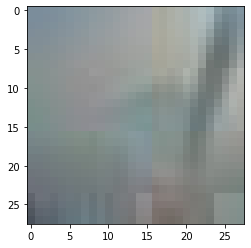

In [299]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.31061956 0.14052121 0.54885924]
라벨: 0, 예측결과: 2


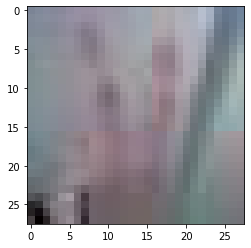

예측확률분포: [0.38883096 0.1346464  0.47652256]
라벨: 1, 예측결과: 2


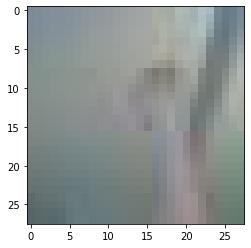

예측확률분포: [0.3886292  0.14101279 0.47035804]
라벨: 1, 예측결과: 2


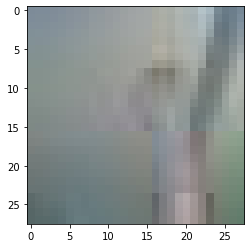

예측확률분포: [0.47441453 0.08429246 0.44129303]
라벨: 1, 예측결과: 0


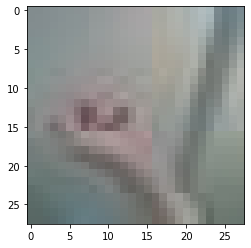

예측확률분포: [0.39041382 0.12477213 0.48481402]
라벨: 1, 예측결과: 2


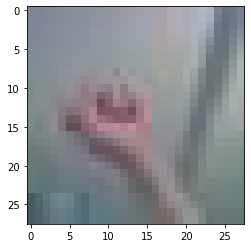

In [300]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 더 좋은 모델 만들기

지금의 모델은 엉망 진창이다... 개선사항들을 적어보자

1. 데이터셋을 다양한 사람들 것을 섞는다.
2. 하이퍼파라미터를 조정해보자
3. 이미지가 너무 불분명하다. resize가 잘못된건 아닌지 확인해보고, 28*28에서 더 늘려보자

baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(28, 
                                                              28,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.experimental.preprocessing.Rescaling(1./255),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])



baseline_history = baseline_model.fit(x_train_norm, y_train, epochs=30,
                                      batch_size=512,
                                      #validation_data=(test_data, test_labels),
                                      verbose=2)

baseline_model.summary()


smaller_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation='relu', input_shape=(28,28,3)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

smaller_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

#baseline_model.summary()


smaller_history = baseline_model.fit(x_train_norm, y_train, epochs=30,
                                      batch_size=512,
                                      #validation_data=(test_data, test_labels),
                                      verbose=2)

bigger_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', input_shape=(28,28,3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

bigger_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

#baseline_model.summary()


bigger_history = baseline_model.fit(x_train_norm, y_train, epochs=30,
                                      batch_size=512,
                                      #validation_data=(test_data, test_labels),
                                      verbose=2)

def plot_history(histories, key='sparse_categorical_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


# 내가 생각한 성능 높이는 방법

1. dataset 크기 늘리기
2. train과 test 데이터 조건 비슷하게!
    - train은 배경 없는 주먹 가위 보 데이터, test는 여러사람들걸로 구성해서 평가받아보자
3. data augumentaion 기법 상용
4. dropout과 L2규제 사용하기
5. layer를 늘리기

# 궁금증
1. data augumentation 을 시도했을때 성능이 급격히 나빠지는 이슈가 생김
2. dropout과 L2규제를 사용해서 오버피팅문제 해결하지 못함
3. train, valid, test 다 다른 조건인게 좋나?